To Do's: 

- zwei code blocks, die mit listen arbeiten in arrays umwandeln -> performanter

Books: 

https://www.taylorfrancis.com/books/edit/10.1201/9780367631888/recommender-systems-pavan-kumar-vairachilai-sirisha-potluri-sachi-nandan-mohanty

https://beluga.sub.uni-hamburg.de/vufind/Record/1656091313?rank=1

In [7]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [8]:
df = pd.read_csv("person-skills_2022-06-27.csv",sep=";")
print("hello")

hello


# Explore data

## Descriptive Statistics

<font color='red'>RESET INDEX NIMMT names PARAMETER NICHT; PANDAS VERSION CHECKEN  </font>

In [9]:
df_value_counts = df.skill.value_counts()
df_value_counts = df_value_counts.to_frame().rename(columns = {"skill" : "frequence"}).reset_index()
#(names = "skill")
df_value_counts = df_value_counts.rename(columns = {"index" : "skill"})
df_value_counts

,skill,frequence
0,Englisch,315
1,MySQL,282
2,SCRUM,276
3,GIT,267
4,HTML,266
...,...,...
732,Final Cut,1
733,Datadog,1
734,Pulumi,1
735,Qlik 12 Certified Data Architekt,1


In [39]:
frequence_percent = df_value_counts.frequence/len(df_value_counts.frequence/len(df))
df_value_counts["frequence_percent"] = frequence_percent
df_value_counts

,skill,frequence,frequence_percent
0,Englisch,315,0.428571
1,MySQL,282,0.383673
2,SCRUM,276,0.375510
3,GIT,267,0.363265
4,HTML,266,0.361905
...,...,...,...
730,Datadog,1,0.001361
731,Professional Scrum Master (PSM),1,0.001361
732,Pulumi,1,0.001361
733,Qlik 12 Certified Data Architekt,1,0.001361


In [40]:
def make_bar_chart(df,y_index,x_index,bol_labels,ticks ,title):
    """This function creates a barchart

    Args:
        df (DataFrame): data
        y_index (int): specifies the column, which is displayed on the y-axis
        x_index (int): specifies the column, which is displayed on the x-axis
        bol_labels (boolean): display bar labels or not
        ticks (_type_): list or False
        title (string): title of the plot
    """
    y_column = df.columns[y_index]
    df_sorted = df.sort_values([str(y_column)], ascending = False)
    plt.figure(figsize=(12, 8))
    ax = df_sorted[str(y_column)].plot(kind="bar")

    x_colum = df.columns[x_index]

    if isinstance(ticks, list) == False:
        ax.set_xticklabels(df_sorted[str(x_colum)])
    else:
        ax.set_xticks(ticks)
    # Create bar labels
    if bol_labels == True:
        rects = ax.patches
        for rect, label in zip(rects, df_sorted[str(y_column)]):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
                ha='center', va='bottom')
    

    ax.set_title(str(title))
    plt.show()

<font color='red'>ADD X AND Y LABELS </font>

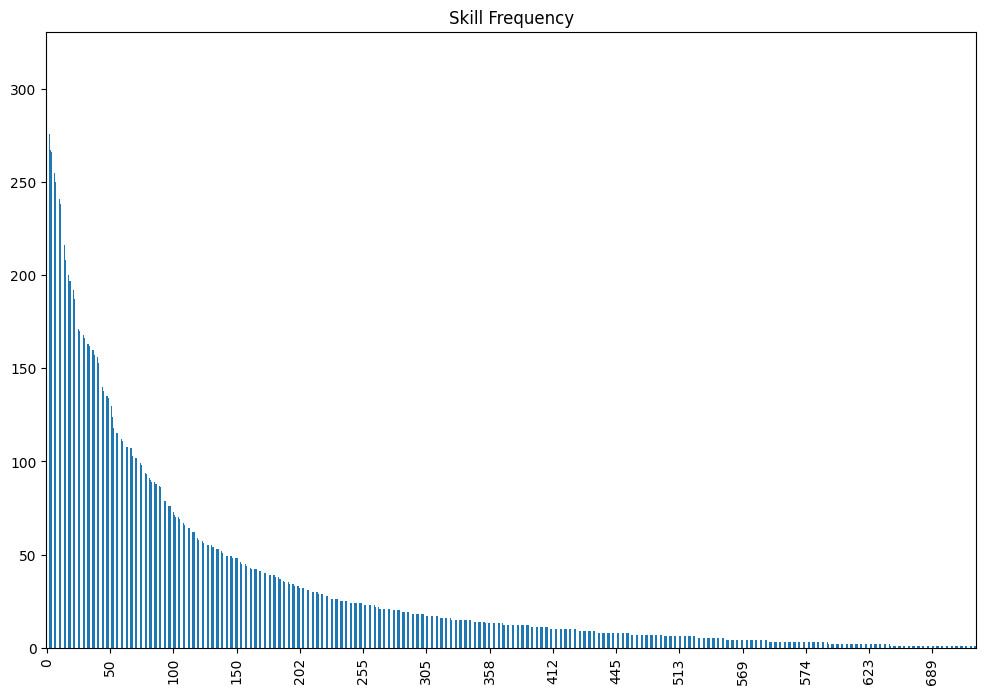

In [41]:
ticks = np.arange(0,750,50).tolist()
make_bar_chart(df_value_counts.reset_index(),2,0,False,ticks,"Skill Frequency")

In [42]:
df_skills_in_categories = df[["skill","category"]].drop_duplicates() #only skills and categories without duplicates
df_skills_in_categories = df_skills_in_categories.groupby(['category'])["skill"].count().sort_values(ascending= False).to_frame().rename(columns = {"skill" : "number_of_skills"}).reset_index()
df_skills_in_categories.head(5)

,category,number_of_skills
0,Sonstige,98
1,Webentwicklung,57
2,Einsatzfelder / Erfahrungen / Schwerpunkte,47
3,Java Frameworks,43
4,Betriebssystem,37


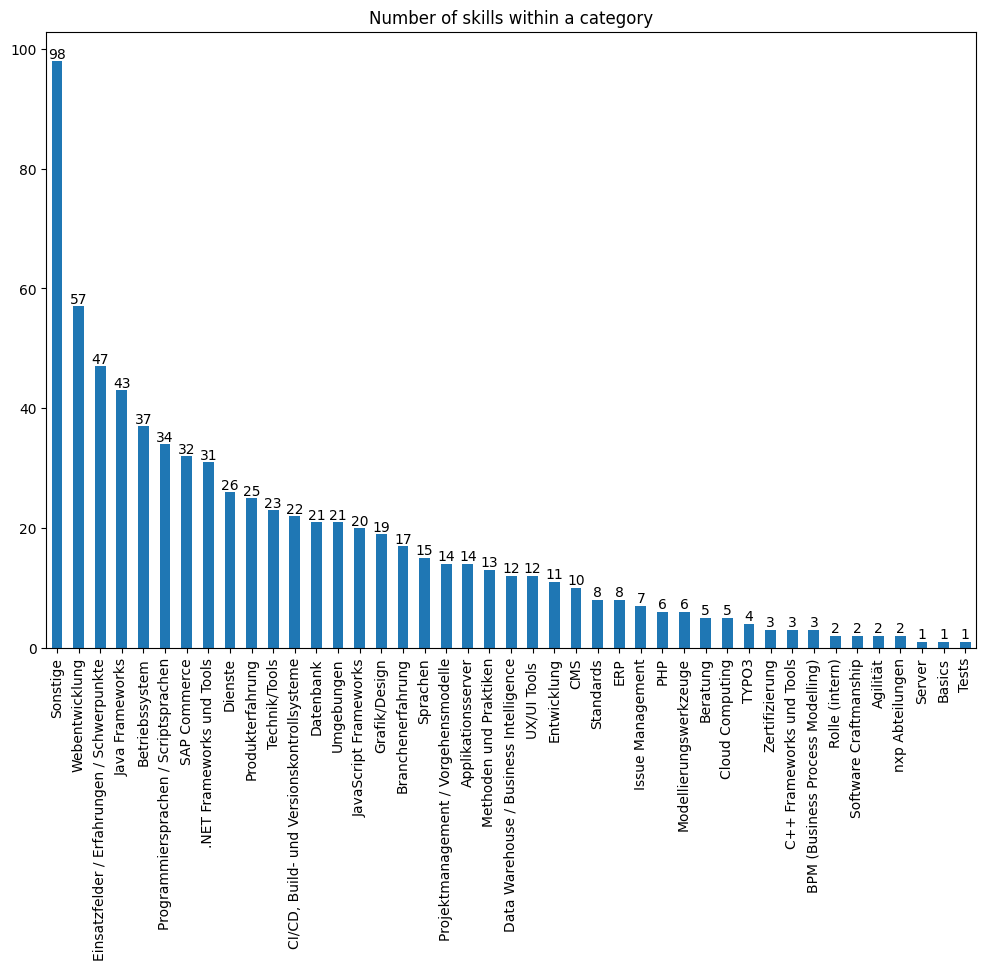

In [43]:
make_bar_chart(df_skills_in_categories,1,0,True,False,"Number of skills within a category")


In [44]:
df_groupby_category_skills = df.groupby(["category", "skill"])["skill"].count().to_frame().rename(columns={"skill": "frequence"}).reset_index()
df_groupby_category_skills.head(5)

,category,skill,frequence
0,.NET Frameworks und Tools,.NET Compact Framework,28
1,.NET Frameworks und Tools,.NET Core,10
2,.NET Frameworks und Tools,.NET Framework,87
3,.NET Frameworks und Tools,ADO.NET,23
4,.NET Frameworks und Tools,ASP Generalist,29


In [45]:
graduations = np.array([])

for i in df_groupby_category_skills.frequence: # 0te Element ist: Series([], Name: frequence, dtype: int64)
    if i > 200: 
        
        graduations = np.append(graduations,"> 200")
    elif i >= 100:
        graduations = np.append(graduations,"100 - 200")
    elif i >= 50:
        graduations = np.append(graduations,"50 - 100")
    elif i >= 10:
        graduations = np.append(graduations,"10 - 50")
    else:
        graduations = np.append(graduations,"< 10")

df_groupby_category_skills["frequence_category"] = graduations
df_groupby_category_skills

,category,skill,frequence,frequence_category
0,.NET Frameworks und Tools,.NET Compact Framework,28,10 - 50
1,.NET Frameworks und Tools,.NET Core,10,10 - 50
2,.NET Frameworks und Tools,.NET Framework,87,50 - 100
3,.NET Frameworks und Tools,ADO.NET,23,10 - 50
4,.NET Frameworks und Tools,ASP Generalist,29,10 - 50
...,...,...,...,...
738,Zertifizierung,CSM – Scrum Master,45,10 - 50
739,Zertifizierung,CSPO – Product Owner,7,< 10
740,Zertifizierung,ISTQB - Foundation Level,10,10 - 50
741,nxp Abteilungen,Pimcore,1,< 10


In [46]:
df_frequence_category = df_groupby_category_skills.groupby(["frequence_category"])["frequence_category"].count().to_frame().rename(columns={"frequence_category": "number_of_skills"}).reset_index()
df_frequence_category

,frequence_category,number_of_skills
0,10 - 50,277
1,100 - 200,57
2,50 - 100,68
3,< 10,324
4,> 200,17


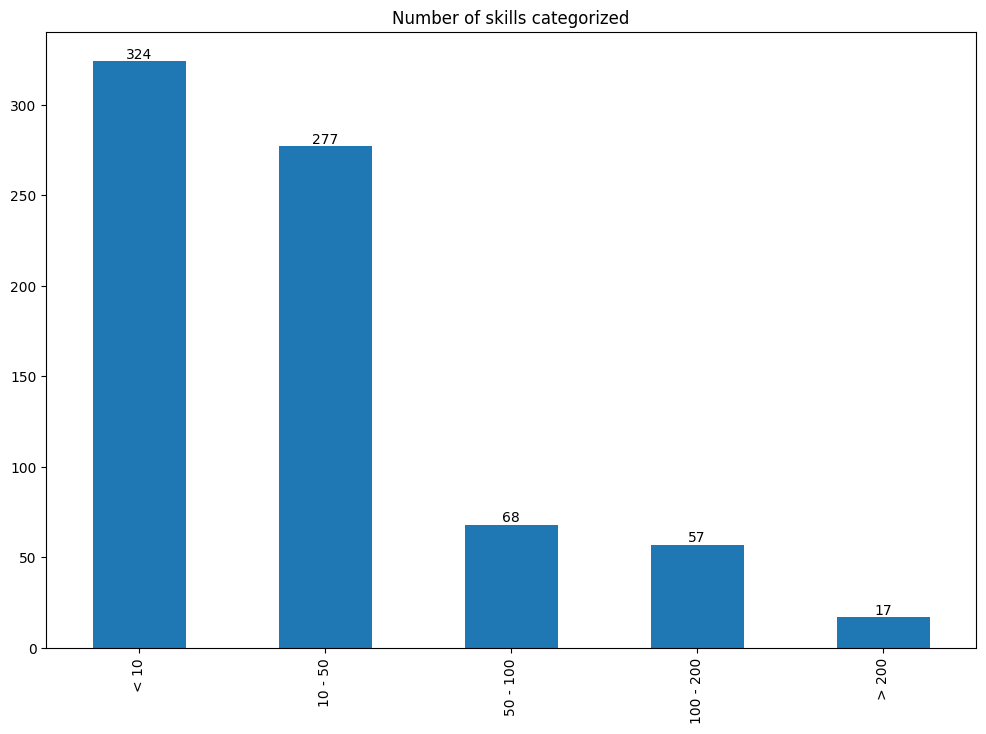

In [47]:
make_bar_chart(df_frequence_category,1,0,True,False,"Number of skills categorized")

In [48]:
######
# Plots the distiribution within a category
#####
def plot_distribution_in_category(category):

    cat = df_groupby_category_skills.loc[df_groupby_category_skills["category"] == category]
    cat = cat.sort_values(["frequence"], ascending = False)
    plt.figure(figsize=(12, 8))
    ax = cat.frequence.plot(kind="bar")
    
    rects = ax.patches
    for rect, label in zip(rects, cat.frequence):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')

    ax.set_xticklabels(cat.skill)
    ax.set_title(f"Frequence of skills within {cat.category.unique()}")
    plt.show()


   

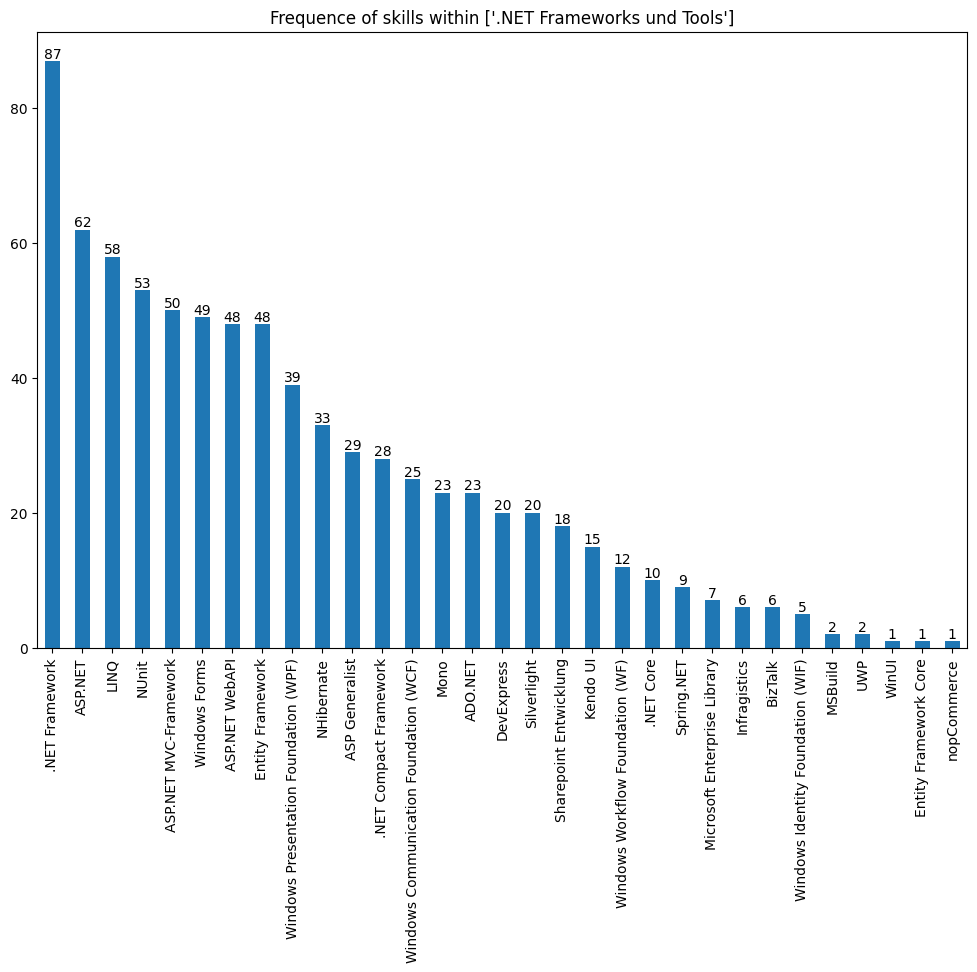

In [49]:
categories = df_groupby_category_skills.category.unique().tolist()
plot_distribution_in_category(categories[0])

## Clustering


In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from kneed import KneeLocator, DataGenerator
from pca import pca
import requests


In [18]:
silhouettes={}

def silhouette_kmeans(X):
    for k in range(2,11): #k from 2 to 10 
        kmeans=KMeans(n_clusters=k, random_state=1) # <- by default, this runs k-means++, starting over 10 times, reporting the best result
        cluster_assignments = kmeans.fit_predict(X)
        silhouettes[k] = silhouette_score(X,cluster_assignments)

    max_silhouette_coef = max(silhouettes.values())
    k_silhouette_max = max(silhouettes, key = silhouettes.get)
    print(f'The highest silhouette coeffizient is {max_silhouette_coef} achieved by clustering of k = {k_silhouette_max}')


In [50]:
silhouette_kmeans(matrix)

The highest silhouette coeffizient is 0.1498641045613138 achieved by clustering of k = 2


In [51]:
matrix

,.NET Compact Framework,.NET Core,.NET Framework,3D-Modellierung,ABAP,ADO.NET,AIX,ARIS,ARIS ITArchitect,AS400,...,ramda.js,ranorex,samba,script.aculo.us,varnish,visual paradigm,vnc,vs code,xHTML,xtCommerce
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Kmeans ist unbrauchbar, da hier die euklidische Distanz berechnet wird und das für binary data nicht sinnvoll ist.

In [54]:
corr_matrix = matrix.cov().round(4)
corr_matrix

,.NET Compact Framework,.NET Core,.NET Framework,3D-Modellierung,ABAP,ADO.NET,AIX,ARIS,ARIS ITArchitect,AS400,...,ramda.js,ranorex,samba,script.aculo.us,varnish,visual paradigm,vnc,vs code,xHTML,xtCommerce
.NET Compact Framework,0.0604,0.0034,0.0236,0.0120,-0.0005,0.0236,0.0010,-0.0013,0.0017,0.0107,...,-0.0002,-0.0003,0.0162,0.0004,-0.0006,-0.0013,0.0120,-0.0019,0.0271,0.0014
.NET Core,0.0034,0.0242,0.0146,-0.0030,-0.0002,0.0085,-0.0006,-0.0005,-0.0003,-0.0007,...,-0.0001,-0.0001,-0.0033,-0.0008,-0.0002,-0.0005,-0.0015,0.0017,-0.0043,-0.0014
.NET Framework,0.0236,0.0146,0.1665,0.0166,-0.0016,0.0351,0.0027,0.0033,0.0024,0.0116,...,-0.0005,0.0014,0.0090,0.0007,-0.0021,-0.0017,0.0231,0.0037,0.0195,-0.0040
3D-Modellierung,0.0120,-0.0030,0.0166,0.1068,0.0016,0.0005,0.0023,0.0001,0.0010,0.0017,...,-0.0003,-0.0006,0.0235,0.0085,0.0013,0.0001,0.0177,-0.0011,0.0413,0.0058
ABAP,-0.0005,-0.0002,-0.0016,0.0016,0.0074,-0.0004,-0.0002,-0.0001,-0.0001,-0.0002,...,-0.0000,-0.0000,-0.0010,-0.0002,-0.0001,0.0023,-0.0012,-0.0002,0.0005,-0.0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visual paradigm,-0.0013,-0.0005,-0.0017,0.0001,0.0023,-0.0011,-0.0004,0.0021,-0.0002,-0.0005,...,-0.0000,-0.0001,0.0023,-0.0006,-0.0002,0.0195,-0.0007,-0.0006,-0.0029,-0.0011
vnc,0.0120,-0.0015,0.0231,0.0177,-0.0012,0.0057,0.0088,-0.0007,0.0030,0.0055,...,-0.0004,-0.0008,0.0628,0.0147,0.0034,-0.0007,0.1353,0.0051,0.0454,0.0235
vs code,-0.0019,0.0017,0.0037,-0.0011,-0.0002,0.0008,-0.0007,-0.0006,-0.0004,0.0017,...,-0.0001,-0.0001,0.0059,0.0015,0.0022,-0.0006,0.0051,0.0289,0.0043,0.0033
xHTML,0.0271,-0.0043,0.0195,0.0413,0.0005,0.0142,0.0063,-0.0029,0.0016,0.0075,...,0.0018,-0.0014,0.0355,0.0235,0.0047,-0.0029,0.0454,0.0043,0.1986,0.0248


In [56]:
# Excluse diagonal
corr_matrix_trans =corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(np.bool))
corr_matrix_trans


C:\Users\Maxi\AppData\Local\Temp\ipykernel_18252\1501005613.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix_trans =corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(np.bool))


,.NET Compact Framework,.NET Core,.NET Framework,3D-Modellierung,ABAP,ADO.NET,AIX,ARIS,ARIS ITArchitect,AS400,...,ramda.js,ranorex,samba,script.aculo.us,varnish,visual paradigm,vnc,vs code,xHTML,xtCommerce
.NET Compact Framework,NaN,0.0034,0.0236,0.0120,-0.0005,0.0236,0.0010,-0.0013,0.0017,0.0107,...,-0.0002,-0.0003,0.0162,0.0004,-0.0006,-0.0013,0.0120,-0.0019,0.0271,0.0014
.NET Core,NaN,NaN,0.0146,-0.0030,-0.0002,0.0085,-0.0006,-0.0005,-0.0003,-0.0007,...,-0.0001,-0.0001,-0.0033,-0.0008,-0.0002,-0.0005,-0.0015,0.0017,-0.0043,-0.0014
.NET Framework,NaN,NaN,NaN,0.0166,-0.0016,0.0351,0.0027,0.0033,0.0024,0.0116,...,-0.0005,0.0014,0.0090,0.0007,-0.0021,-0.0017,0.0231,0.0037,0.0195,-0.0040
3D-Modellierung,NaN,NaN,NaN,NaN,0.0016,0.0005,0.0023,0.0001,0.0010,0.0017,...,-0.0003,-0.0006,0.0235,0.0085,0.0013,0.0001,0.0177,-0.0011,0.0413,0.0058
ABAP,NaN,NaN,NaN,NaN,NaN,-0.0004,-0.0002,-0.0001,-0.0001,-0.0002,...,-0.0000,-0.0000,-0.0010,-0.0002,-0.0001,0.0023,-0.0012,-0.0002,0.0005,-0.0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visual paradigm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.0007,-0.0006,-0.0029,-0.0011
vnc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0051,0.0454,0.0235
vs code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0043,0.0033
xHTML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0248


In [59]:
corr_matrix_trans_stacked  = corr_matrix_trans.stack()
corr_matrix_trans_stacked

.NET Compact Framework  .NET Core          0.0034
                        .NET Framework     0.0236
                        3D-Modellierung    0.0120
                        ABAP              -0.0005
                        ADO.NET            0.0236
                                            ...  
vnc                     xHTML              0.0454
                        xtCommerce         0.0235
vs code                 xHTML              0.0043
                        xtCommerce         0.0033
xHTML                   xtCommerce         0.0248
Length: 271216, dtype: float64

In [63]:
corr_matrix_trans_stacked[corr_matrix_trans_stacked > 0.2]

Test Driven Development (TDD)  Unit Tests (Komponententests)    0.2065
dtype: float64

* Data is 737-dimensional 
* We observe alot  covariances greater than 0 between most of features, but no  high covariance (0.7 < covariance < 1).
* Largest covariance is 0.2065
* Conclusion: Features are slightly correlated, there is a smaller intrisic dimension

In [44]:
#### 
# PCA
####
pc_a=pca(n_components= 0.95) #i want 95% of the total variance to be explained by the PC
pca_transformed=pc_a.fit_transform(matrix)
matrix_pca=pd.DataFrame(pca_transformed["PC"])
matrix_pca.round(2)
#pca_transformed
#pca_transformed

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [737] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [196] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [737] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[196]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196
12,1.84,0.83,1.77,0.72,0.64,-0.93,-0.81,1.19,-1.62,-0.45,...,0.26,0.09,-0.25,-0.12,0.03,0.07,0.06,-0.16,-0.13,0.22
13,1.37,1.49,-0.35,3.15,-0.74,-0.48,0.16,0.46,-0.23,-0.43,...,0.15,0.10,0.18,-0.40,-0.20,0.30,0.60,0.38,-0.03,-0.07
15,-1.43,0.83,-0.58,-0.47,-1.39,-0.48,0.47,0.68,-0.70,-0.54,...,0.17,0.16,-0.22,-0.25,-0.10,-0.53,0.12,-0.17,0.06,0.02
16,-1.82,1.23,-0.25,-0.55,-1.22,0.19,0.42,0.24,-0.38,0.18,...,0.09,0.06,-0.20,-0.07,-0.02,-0.10,0.07,-0.07,0.11,0.35
17,-3.78,-0.92,-0.61,0.10,-0.04,-0.30,-0.49,-0.16,0.28,-0.37,...,0.08,-0.04,0.06,-0.07,-0.06,-0.02,0.01,-0.03,0.02,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,-3.09,-0.96,-0.68,0.51,-0.35,-0.18,-0.34,0.27,0.24,-0.08,...,0.07,0.01,0.10,0.00,0.06,0.14,0.07,-0.01,0.05,-0.09
1474,-2.41,0.14,0.29,-0.05,-0.95,-0.12,-0.74,-0.37,-0.19,-0.07,...,0.17,-0.00,-0.14,-0.12,0.27,-0.15,0.27,0.26,0.10,-0.13
1475,-3.53,-0.72,-0.59,0.15,0.34,-0.55,-0.40,-0.14,0.32,-0.16,...,0.04,0.11,-0.13,-0.11,0.15,-0.04,-0.10,-0.01,-0.18,-0.06
1479,-3.27,-0.53,-0.40,0.54,-0.20,-0.35,-0.24,-0.24,0.06,-0.24,...,-0.05,0.26,0.06,0.13,-0.12,-0.18,-0.11,0.01,-0.05,0.13


In [64]:
### Clustering the matrix after pca 
silhouette_kmeans(matrix_pca)

The highest silhouette coeffizient is 0.15977200349517695 achieved by clustering of k = 2


# Notizen
* Evt Überlegen, ob wir die Kategorien wie Betriebssysteme usw. im ersten Lauf noch beibehalten sollten


Drop certain skill categories: 

# Recommender 

## Nearest Neighbors Approach

In [10]:
data = df#[~df["category"].isin(["Betriebssystem", "Dienste", "Einsatzfelder / Erfahrungen / Schwerpunkte", "Rolle (intern)"])]

In [11]:
data.head(20)

,person,skill,category
0,12,Windows NT/2000/XP,Betriebssystem
1,12,MAC OS X,Betriebssystem
2,12,Windows 7,Betriebssystem
3,12,Windows 8,Betriebssystem
4,12,iOS,Betriebssystem
5,12,Android,Betriebssystem
6,12,PostgreSQL,Datenbank
7,12,MySQL,Datenbank
8,12,LDAP,Datenbank
9,12,Microsoft Access,Datenbank


In [12]:
employee_dict = {}
for n in range(1,data["person"].nunique()+1):
    employee_dict[n] = data["person"].unique()[n-1]

In [13]:
# So later functions work, it makes sense to rename persons from 1 to maxno. 
# Create dictionary which matches the employee
persons = data["person"].unique()
#np.arange(1,len(data["person"].unique())+1)
skills = sorted(data["skill"].unique())

In [14]:
skills_per_person = []
for person in data["person"].unique(): 
    skillset = []
    for skill in skills:
        if skill in data[data["person"] == person]["skill"].unique():
            skillset.append(1)
        else:
            skillset.append(0)
    skills_per_person.append(skillset)


In [15]:
matrix = pd.DataFrame(index=persons,columns=skills,data=skills_per_person)

In [16]:
matrix

,.NET Compact Framework,.NET Core,.NET Framework,3D-Modellierung,ABAP,ADO.NET,AIX,ARIS,ARIS ITArchitect,AS400,...,ramda.js,ranorex,samba,script.aculo.us,varnish,visual paradigm,vnc,vs code,xHTML,xtCommerce
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Employee-employee approach

Similarity between employees: due to dichotomous nature of data, Jaccard similarity is used for computing the similarity between employees. 

In [57]:
def jaccard_binary(x,y):
    """A function for finding the similarity between two binary vectors"""
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / float(union.sum())
    return similarity

In [58]:
def compute_jaccard_sim(data,employee):
    sim = pd.DataFrame(index=[employee])
    employee_data = data.loc[employee]
    sim_data = data.drop(employee,axis=0)
    for emp in sim_data.index:
        new_sim = pd.DataFrame(index=[employee],columns=[emp],data=jaccard_binary(employee_data,sim_data.loc[emp]))
        sim = pd.concat([sim,new_sim],axis=1)
    return sim       

In [59]:
def compute_n_nearest_neighbors(data,employee,n):
    neighbors = pd.DataFrame(index=[employee])
    similarities = compute_jaccard_sim(data,employee)
    for i in range(0,n):
        nearest_neighbor = similarities[similarities.idxmax(axis=1)]
        neighbors = pd.concat([neighbors,nearest_neighbor],axis=1)
        similarities.drop(nearest_neighbor,axis=1,inplace=True)
    return neighbors.columns.to_list()

In [60]:
def predict_skills_for_employee(data,employee,n_neighbors):
    neighbors = compute_n_nearest_neighbors(data,employee,n_neighbors)
    values_of_employee = data.loc[employee].to_numpy()
    neighbors_matrix = data.loc[neighbors].to_numpy()
    predicted_values = np.array([])
    for i in range(0,len(values_of_employee)):
        if values_of_employee[i] == 0: 
            predicted_values = np.append(predicted_values,
                                            # weighted averahe might be more accurate
                                            np.mean(neighbors_matrix[:,i]))
        else: 
            predicted_values = np.append(predicted_values,values_of_employee[i])
    return predicted_values

In [61]:
def predict_skills_for_matrix(data,n_neighbors): 
    # create emppy array of length according to columns (in order for later vstack to work)
    return_data = np.zeros(len(data.columns))
    for i in data.index: 
        single_predicition = predict_skills_for_employee(data,i,n_neighbors)
        return_data = np.vstack([return_data,single_predicition])
    # delete first entry (zeros) from return data
    return_data = return_data[1:len(return_data)]
    return pd.DataFrame(index=data.index,columns=data.columns,data=return_data)

In [62]:
#predict_skills_for_matrix(matrix,10)

## Matrix Facorization

Create matrix with values between 1 and 5 for recommender trials

Values between 1 and 5 should not be arbitrary. As weight for their score, the frequency of the underlying category for each skill will be taken into account. For instance, if employee 12 has four skills in the category programming language and one skill in data banks, each programming skill will be evaluated with a respectivley high score. 

In [63]:
skills_to_category = pd.read_csv("mitarbeiterportal-skills_2022-06-21.csv",sep=";",header=None)
category_dict = dict(zip(skills_to_category[0],skills_to_category[1]))

In [64]:
def scaler_1_5(x,old_max,old_min):
    OldRange = (old_max - old_min)  
    if (OldRange == 0):
        return 1
    else:
        NewRange = (5 - 1)  
        return round((((x - 1) * NewRange) / OldRange) + 1)

In [65]:
# create dataframe for each employee and their category count
categories = data["category"].unique()
category_per_employee = pd.DataFrame(index=categories)
for p in persons:
    p_skills = data[data["person"] == p]
    # count categories for each employee
    category_count = p_skills["category"].value_counts()
    category_count = category_count.apply(lambda x:scaler_1_5(x,category_count.max(),category_count.min()))
    skill_values = np.array([])
    # add count for each category to an array and 0 if category wasn't found (and therefore is not part of resptive employee's skillset)
    for cat in categories:
        try:
            skill_values = np.append(skill_values,category_count[cat])
        except KeyError:
            skill_values = np.append(skill_values,0)
    # add employee data to dataframe
    p_skills_df = pd.DataFrame(index=categories,columns=[p],data=skill_values)
    category_per_employee = pd.concat([category_per_employee,p_skills_df],axis=1)

In [66]:
skills_per_person_weighted = []
for p in persons: 
    skillset = []
    for skill in skills:
        if skill in data[data["person"] == p]["skill"].unique():
            skillset.append(category_per_employee[p][category_dict[skill]])
        else:
            skillset.append(0)    
    skills_per_person_weighted.append(skillset)

In [67]:
matrix_mod = pd.DataFrame(index=persons,columns=skills,data=skills_per_person_weighted)
matrix_mod

,.NET Compact Framework,.NET Core,.NET Framework,3D-Modellierung,ABAP,ADO.NET,AIX,ARIS,ARIS ITArchitect,AS400,...,ramda.js,ranorex,samba,script.aculo.us,varnish,visual paradigm,vnc,vs code,xHTML,xtCommerce
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1479,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system

In [68]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, train_test_split

In [69]:
matrix_mod[matrix_mod == 0].count().sum()/matrix_mod[matrix_mod != 0].count().sum()

11.287002937890511

11 times more 0 values than values with a rating.

In [70]:
skill_alphabetically = sorted(skills_to_category[0].to_list())
skills_dict = {x:skill_alphabetically[x] for x in range(0,len(skill_alphabetically))}

In [71]:
employee_dict_inv = {v: k for k, v in employee_dict.items()}

Create data structure suitable for surprise library:

In [72]:
df_np = df.to_numpy()

for i in range(0,len(df_np)):
    df_np[i][2] = matrix_mod.loc[df_np[i][0]][df_np[i][1]]

df_rated = pd.DataFrame(df_np)
df_rated.columns = ["Employee","Skill","Rating"]
df_rated

,Employee,Skill,Rating
0,12,Windows NT/2000/XP,4.0
1,12,MAC OS X,4.0
2,12,Windows 7,4.0
3,12,Windows 8,4.0
4,12,iOS,4.0
...,...,...,...
24581,1488,Deutsch,1.0
24582,1488,Spring-JPA,5.0
24583,1488,Maven,3.0
24584,1488,Subversion,3.0


In [81]:
reader = Reader()
svd_data = Dataset.load_from_df(df_rated,reader)

RMSE >= 0.75 -> bueno <br>
MAE? no sé

In [74]:
svd = SVD()
cv = cross_validate(svd, svd_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8318  0.8391  0.7954  0.8275  0.8193  0.8226  0.0150  
MAE (testset)     0.6387  0.6496  0.6106  0.6375  0.6329  0.6339  0.0128  
Fit time          0.10    0.10    0.10    0.11    0.11    0.10    0.01    
Test time         0.01    0.01    0.01    0.01    0.02    0.01    0.00    


In [75]:
trainset, testset = train_test_split(svd_data, test_size=0.25)
svd.fit(trainset)

In [76]:
predictions = svd.test(testset)

In [77]:
def get_skills_of_employee(emp_id):
    return df_rated[df_rated["Employee"] == emp_id].T

Manual prediciton testing: input skill of employee that they already know and check the prediciton vs. the actual value

In [82]:
employee_id = str(1479)
skill_id = ".NET Core" 

# get a prediction for specific users and items.
pred = svd.predict(employee_id, skill_id, r_ui=5, verbose=True)

user: 1479       item: .NET Core  r_ui = 5.00   est = 3.43   {'was_impossible': False}


In [79]:
get_skills_of_employee(12)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Employee,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Skill,Windows NT/2000/XP,MAC OS X,Windows 7,Windows 8,iOS,Android,PostgreSQL,MySQL,LDAP,Microsoft Access,...,TeamCity,Docker,Mockito,Windows 10,JavaScript,SQL,SCRUM,JIRA,Maven,Visual Studio
Rating,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,...,4.0,2.0,1.0,4.0,3.0,3.0,3.0,1.0,4.0,2.0


HOW TO EVALUATE RECOMMENATIONS? <BR>
HOW TO IMPLEMENT NEAT WAY OF GETTING RECOMMENDATIONS/RECOMMEND EMPLOYEES FOR CERTAIN SKILLS